<a id='top'></a>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
from patsy import dmatrices
%matplotlib inline

In [2]:
file_path = 'hubble.csv'

df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Galaxy  24 non-null     object 
 1   y       24 non-null     int64  
 2   x       24 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 704.0+ bytes


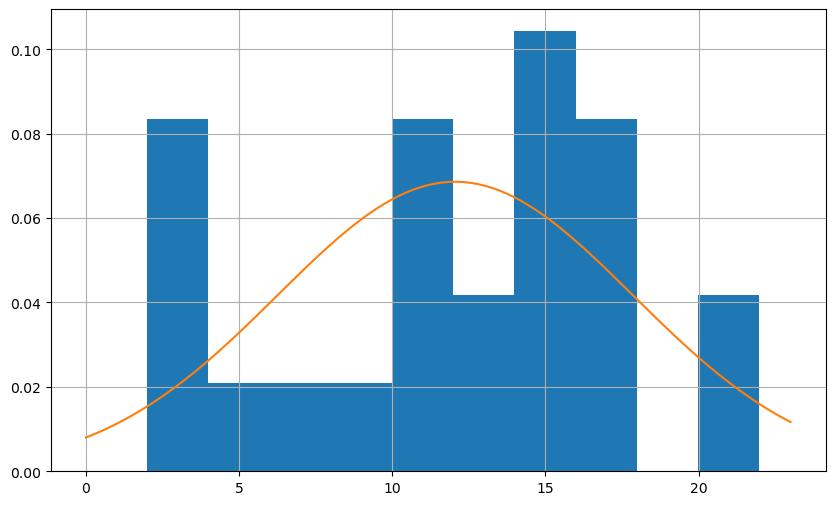

In [3]:
fig, ax= plt.subplots(figsize=(10,6))

x = np.linspace(0,23,100)

df['x'].hist(label='Hubble Data', density=1)
ax.plot(x, stats.norm.pdf(x, loc=df['x'].mean(), scale=df['x'].std()))

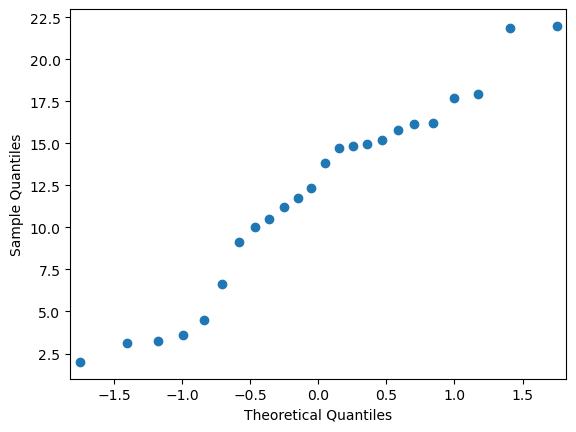

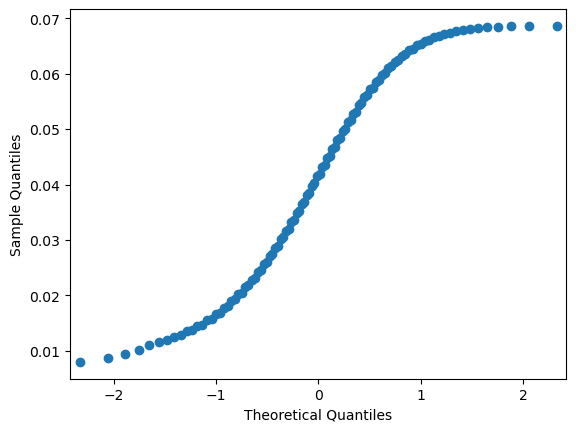

In [4]:
a = sm.qqplot(df['x'])
b = sm.qqplot(stats.norm.pdf(x, loc=df['x'].mean(), scale=df['x'].std()))

In [5]:
import math

mean = df['x'].mean()
tValue = stats.t.ppf(0.025,23)
std = np.std(df['x'], ddof=1)
trials = math.sqrt(24)

UpperCI = mean + (tValue * (std / trials))
LowerCI = mean - (tValue * (std / trials))

print("Calculated Confidence Interval: (", UpperCI, ", ", LowerCI, ")")

Calculated Confidence Interval: ( 9.599272544248015 ,  14.509894122418649 )


In [6]:
print("Python Generated Confidence Interval:", stats.t.interval(0.95, df=len(df['x'])-1, loc=np.mean(df['x']), scale=stats.sem(df['x'])))

Python Generated Confidence Interval: (9.599272544248015, 14.509894122418649)


In [7]:
byHand = (9.599272544248015 + 14.509894122418649) / 2
byPython = df['x'].mean()

print("Calculated by hand:", byHand)
print("Calculated by Python:", byPython)

Calculated by hand: 12.054583333333332
Calculated by Python: 12.054583333333332


In [8]:
pValue = stats.ttest_1samp(df['x'], 16).pvalue

print("Calculated p-value:", pValue)
print("Observe that our calculated p-value is smaller than our alpha.")
print("Therefore, we can reject our null hypothesis and accept our alternative hypothesis.")

Calculated p-value: 0.0029535863887783795
Observe that our calculated p-value is smaller than our alpha.
Therefore, we can reject our null hypothesis and accept our alternative hypothesis.


[9.781666666666666, 14.285489583333334]


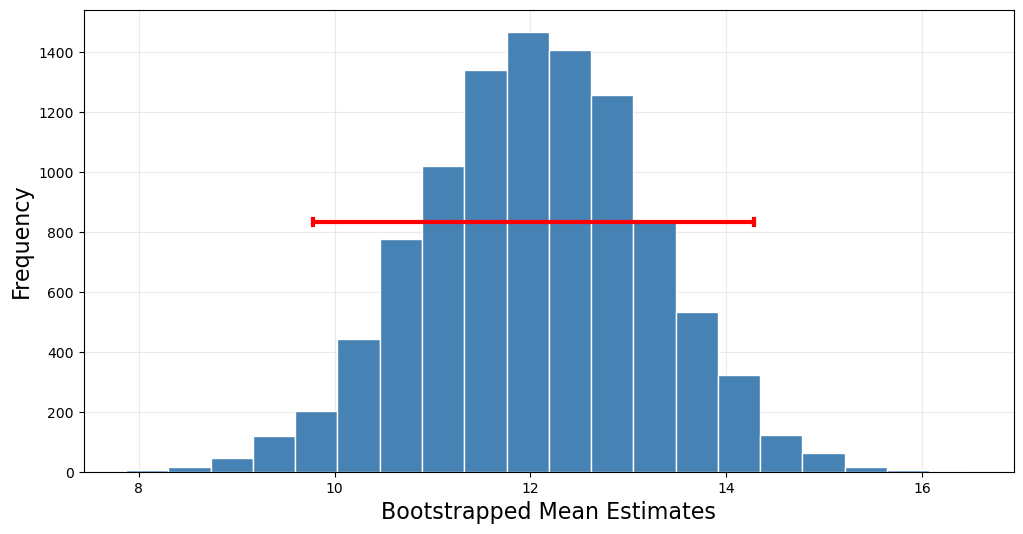

In [9]:
def bootstrapped_mean(sample, num_boots=10000):
    list_of_means = []
    
    #Generating Bootstrapped Means
    for i in range(0,num_boots):
        resample = np.random.choice(sample, size=len(sample))
        mean_resample = np.mean(resample)
        list_of_means.append(mean_resample)
    
    #Generating Confidence Interval
    UpperCI = np.percentile(list_of_means, 97.5)
    LowerCI = np.percentile(list_of_means, 2.5)
    CI = [LowerCI, UpperCI]
    
    #Plotting Graph
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_means).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)

    return CI

print(bootstrapped_mean(df['x']))

[4.433903392878635, 6.561711727541138]


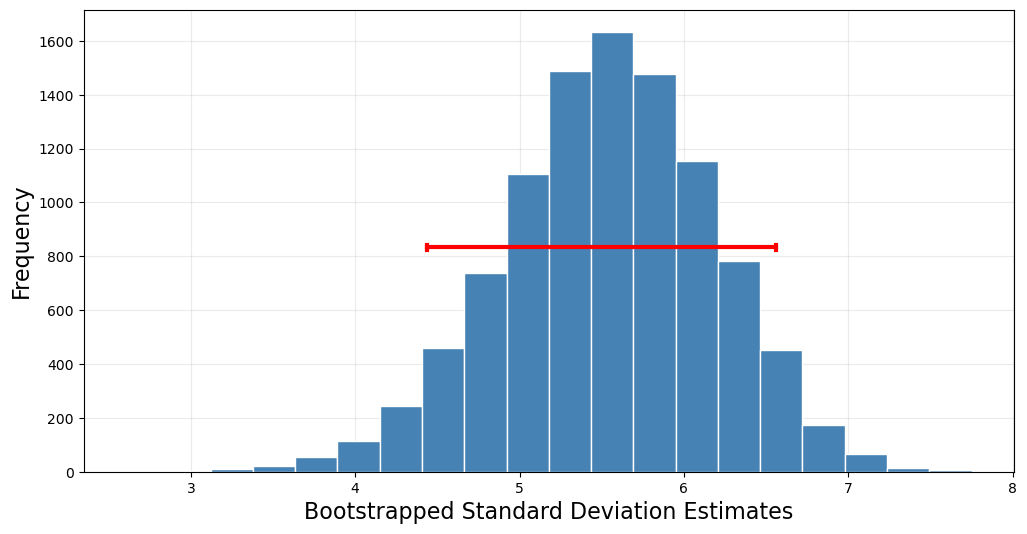

In [10]:
def bootstrapped_stds(sample, num_boots=10000):
    list_of_stds = []
    
    #Generating Bootstrapped Means
    for i in range(0,num_boots):
        resample = np.random.choice(sample, size=len(sample))
        std_resample = np.std(resample)
        list_of_stds.append(std_resample)
    
    #Generating Confidence Interval
    UpperCI = np.percentile(list_of_stds, 95)
    LowerCI = np.percentile(list_of_stds, 5)
    CI = [LowerCI, UpperCI]
    
    #Plotting Graph
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_stds).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Standard Deviation Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)

    return CI

print(bootstrapped_stds(df['x']))

[3.63, 11.22]


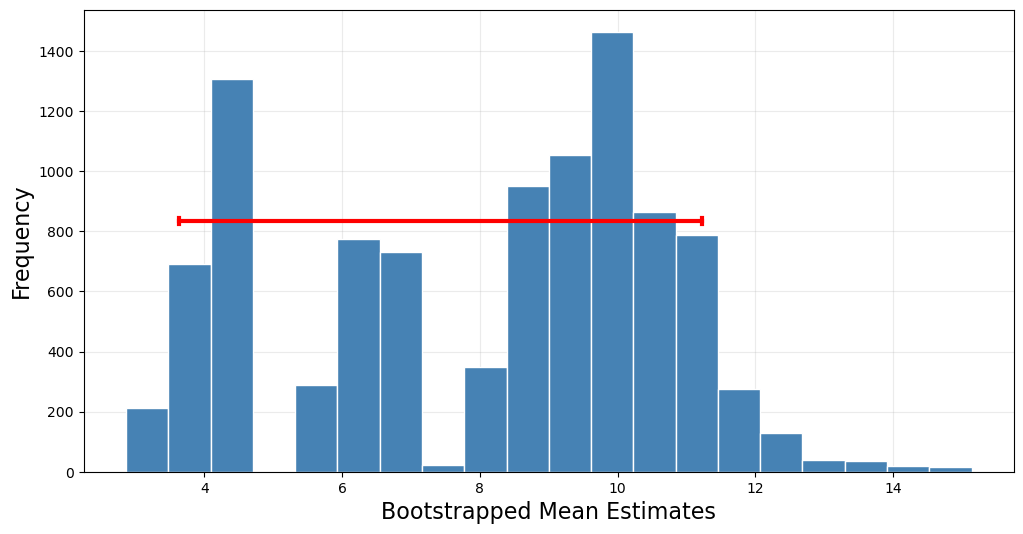

In [11]:
def bootstrapped_lq(sample, num_boots=10000):
    list_of_lqs = []
    
    #Generating Bootstrapped Means
    for i in range(0,num_boots):
        resample = np.random.choice(sample, size=len(sample))
        lq_resample = np.quantile(resample, 0.25)
        list_of_lqs.append(lq_resample)
    
    #Generating Confidence Interval
    UpperCI = np.percentile(list_of_lqs, 92.5)
    LowerCI = np.percentile(list_of_lqs, 7.5)
    CI = [LowerCI, UpperCI]
    
    #Plotting Graph
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_lqs).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)

    return CI

print(bootstrapped_lq(df['x']))

[14.295, 17.7625]


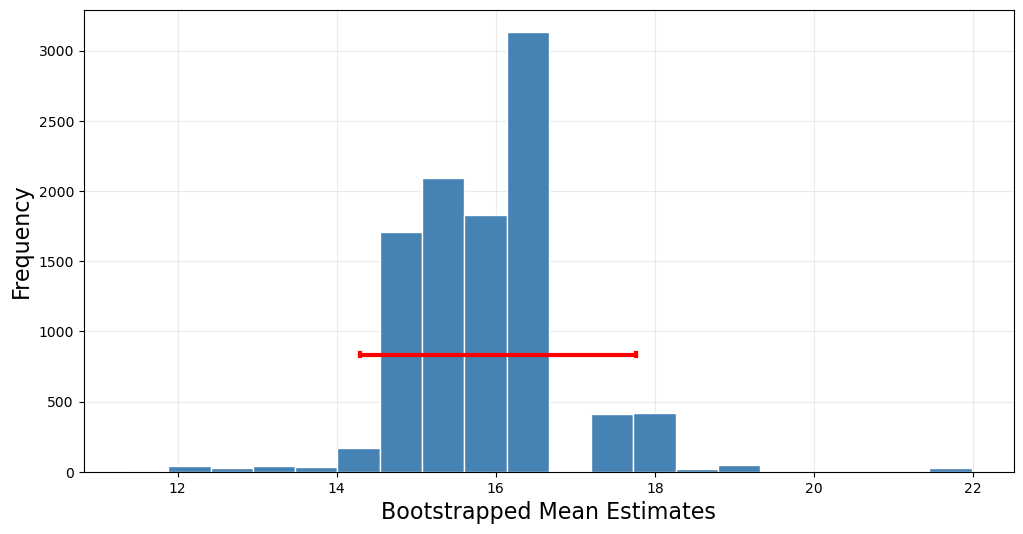

In [12]:
def bootstrapped_uq(sample, num_boots=10000):
    list_of_uqs = []
    
    #Generating Bootstrapped Means
    for i in range(0,num_boots):
        resample = np.random.choice(sample, size=len(sample))
        uq_resample = np.quantile(resample, 0.75)
        list_of_uqs.append(uq_resample)
    
    #Generating Confidence Interval
    UpperCI = np.percentile(list_of_uqs, 97)
    LowerCI = np.percentile(list_of_uqs, 3)
    CI = [LowerCI, UpperCI]
    
    #Plotting Graph
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_uqs).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)

    return CI

print(bootstrapped_uq(df['x']))

[4.92, 11.594999999999999]


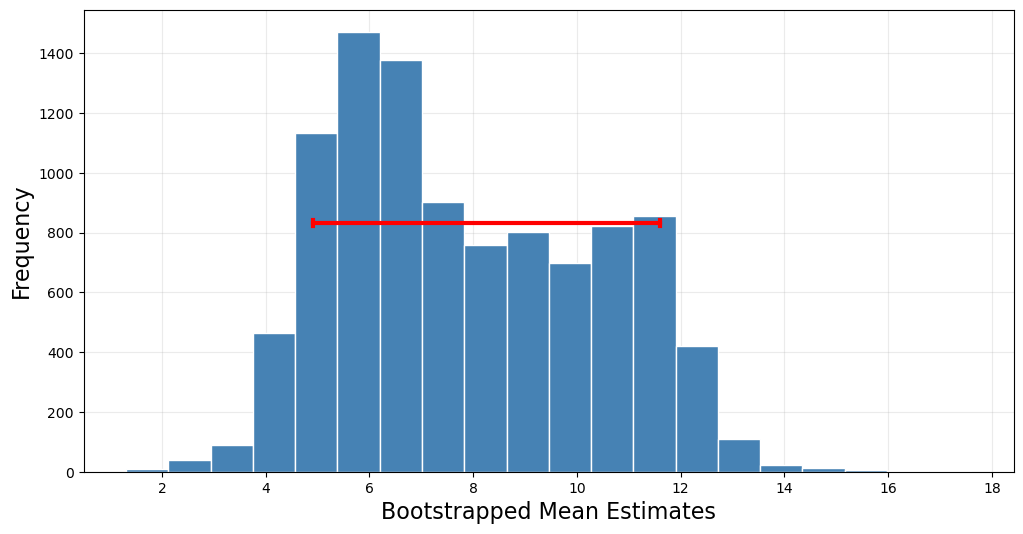

In [13]:
def bootstrapped_iqr(sample, num_boots=10000):
    list_of_iqrs = []
    
    #Generating Bootstrapped Means
    for i in range(0,num_boots):
        resample = np.random.choice(sample, size=len(sample))
        iqr_resample = np.quantile(resample, 0.75) - np.quantile(resample, 0.25)
        list_of_iqrs.append(iqr_resample)
    
    #Generating Confidence Interval
    UpperCI = np.percentile(list_of_iqrs, 90)
    LowerCI = np.percentile(list_of_iqrs, 10)
    CI = [LowerCI, UpperCI]
    
    #Plotting Graph
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(list_of_iqrs).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)

    return CI

print(bootstrapped_iqr(df['x']))

<AxesSubplot:xlabel='Calc', ylabel='Rate'>

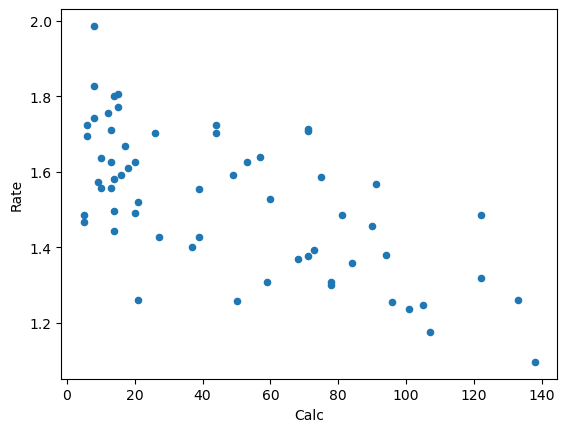

In [14]:
file_path = "mortality.csv"
df = pd.read_csv(file_path)
df.plot.scatter(x = 'Calc', y='Rate')

In [15]:
lmMortality = sm.OLS(df['Rate'], sm.add_constant(df['Calc'])).fit()
print(lmMortality.summary())

print("Fitted Model: Y = {:.5f} + {:.5f}x".format(lmMortality.params[0], lmMortality.params[1]))

                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.03e-08
Time:                        22:20:17   Log-Likelihood:                 33.088
No. Observations:                  61   AIC:                            -62.18
Df Residuals:                      59   BIC:                            -57.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6764      0.029     57.217      0.0

In [16]:
print("Coefficients: ", lmMortality.params)
print("Standard errors: ", lmMortality.bse)
print("p-values: ", lmMortality.pvalues)
print("Confidence intervals", lmMortality.conf_int(.05))

Coefficients:  const    1.676356
Calc    -0.003226
dtype: float64
Standard errors:  const    0.029298
Calc     0.000485
dtype: float64
p-values:  const    2.165827e-53
Calc     1.033134e-08
dtype: float64
Confidence intervals               0         1
const  1.617730  1.734981
Calc  -0.004196 -0.002256


Text(0.5, 1.0, 'Data and Fit')

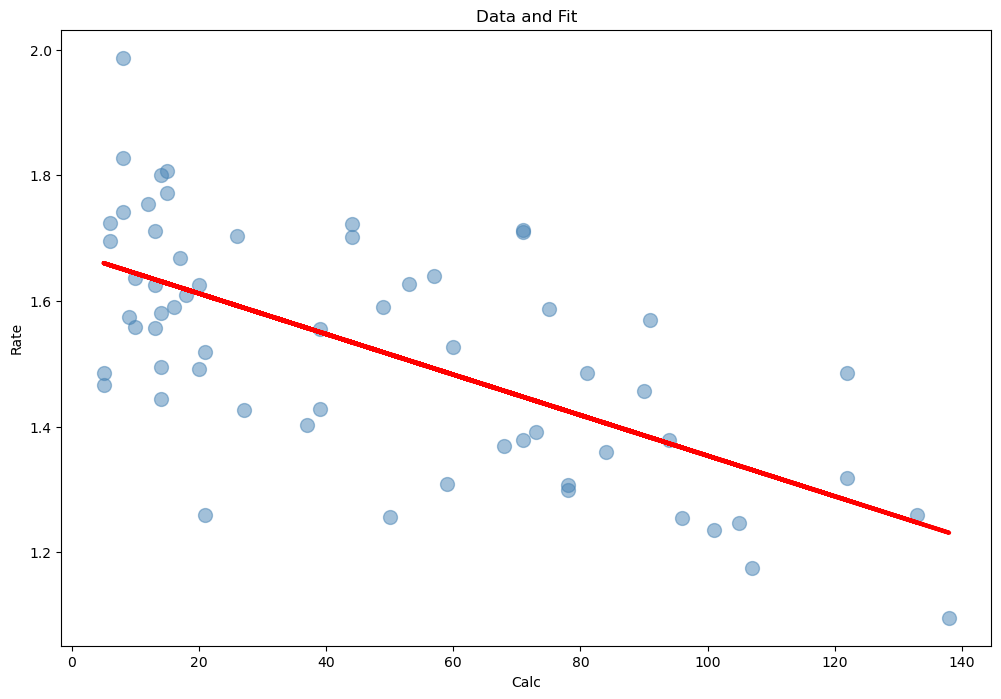

In [17]:
fig, ax= plt.subplots(figsize=(12,8))
ax.scatter(df['Calc'], df['Rate'],color="steelblue", alpha=0.5, s=100)
ax.plot( df['Calc'], lmMortality.fittedvalues,color='red',lw=3)
ax.set_xlabel('Calc')
ax.set_ylabel('Rate')
ax.set_title('Data and Fit')

Text(0.5, 1.0, 'Histogram of Residuals')

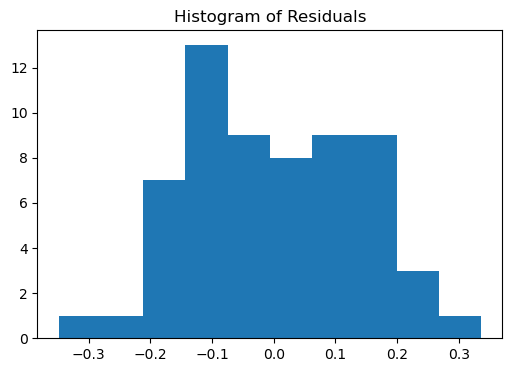

In [18]:
fig, ax= plt.subplots(figsize=(6,4))

ax.hist(lmMortality.resid)
ax.set_title('Histogram of Residuals')

Figure(640x480)


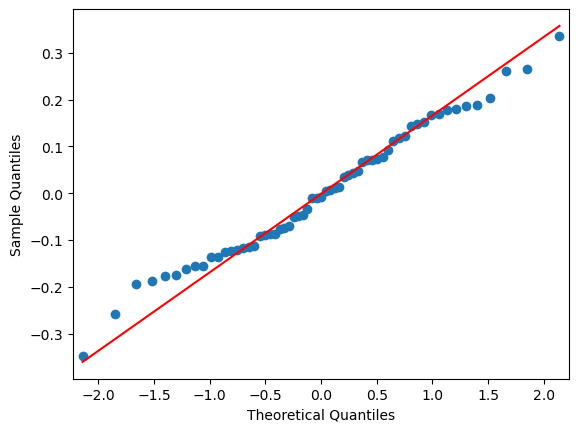

In [19]:
print(sm.qqplot(lmMortality.resid,line='q'))

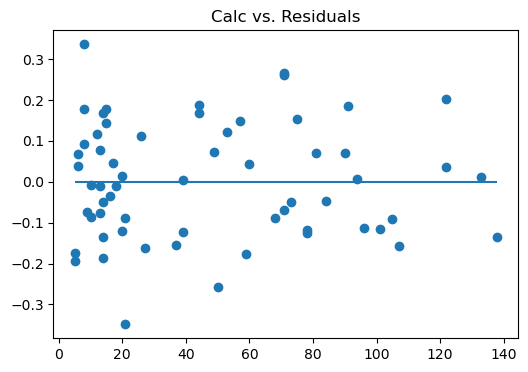

In [20]:
fig, ax= plt.subplots(figsize=(6,4))

ax.scatter(df["Calc"], lmMortality.resid)
ax.set_title('Calc vs. Residuals')
ax.hlines(0, xmin=np.min(df['Calc']), xmax=np.max(df['Calc']))

In [22]:
x = df["Calc"]
y = df["Rate"]

bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

yhat = ahat + bhat*x 
SSE  = np.sum((y-yhat)**2)  
SSR  = np.sum((np.mean(y)-yhat)**2)  
SST  = np.sum((np.mean(y)-y)**2) 
R2 = 1 - SSE/SST 

print("R-Squared =", R2)

R-Squared = 0.42882671931249716


In [44]:
tValue = stats.t.ppf(0.005,59)

print("The cutoff for the rejection region is:", tValue)

The cutoff for the rejection region is: -2.661758753498684


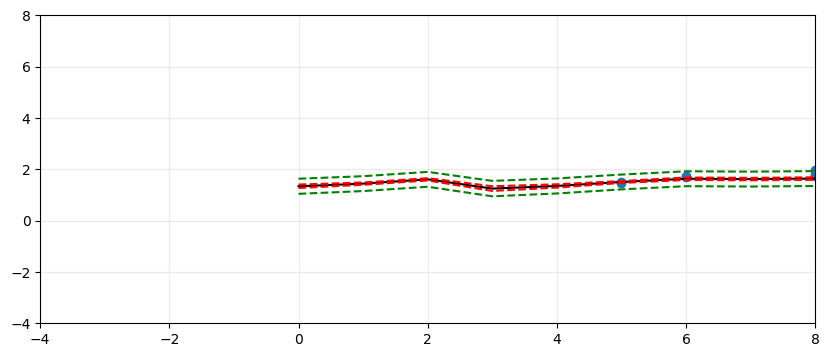

In [67]:
predictions = lmMortality.get_prediction()
predmat=predictions.summary_frame(alpha=0.05)

#plot it all
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,8])
ax.set_ylim([-4,8])
plt.scatter(x,y, label='data')

#Plot each column
plt.plot((predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(predmat.obs_ci_upper, 'g--', label='Pred Up')